# Multiclass classification

### model

In [ ]:
import torch
import torch.nn as nn

class MulticlassClassificationModel(nn.Module):
    def __init__(self, layers):
        super(MulticlassClassificationModel, self).__init__()
        layer_list  = []
        for idx, layer in enumerate(layers):
            in_feat, out_feat = layer
            layer_list.append(nn.Linear(in_features=in_feat, out_features=out_feat))
            if idx < len(layers)-1:
                layer_list.append(nn.ReLU())
        self.layers = nn.Sequential(*layer_list)

    def forward(self, x):
        return self.layers(x)

### dataset

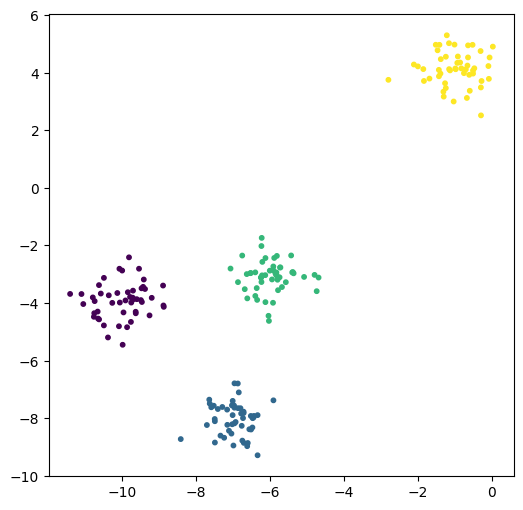

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 200
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=[[-10, -4], [-7, -8], [-6, -3], [-1, 4],], cluster_std=0.6)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.show()


### train

In [ ]:
from sklearn.datasets import make_blobs
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

def get_dataset(n_samples: int, batch_size: int):
    n_samples = 200
    X, y = make_blobs(n_samples=n_samples, n_features=3, centers=[[-10, -4, 2], [-7, -8, 0], [-6, -3, 4], [-1, 4, 7]], cluster_std=0.3)
    dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
    return DataLoader(dataset=dataset, batch_size=batch_size), X

def get_device():
    if torch.cuda.is_available():
        return "cuda"
    elif torch.backends.mps.is_available():
        return "mps"
    else:
        return "cpu"

def train(data_loader, n_samples, model, loss_function, optimizer, device, y_type=None):
    epoch_loss, epoch_acc = 0., 0

    for X, y in data_loader:

        X, y = X.to(device), y.to(device)

        pred = model(X)
        y = y.type(y_type) if y_type is not None else y
        loss = loss_function(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * len(X)
        is_corrects = torch.argmax(pred, dim=1) == y
        corrects_count = is_corrects.sum().item()
        epoch_acc += corrects_count

    return epoch_loss / n_samples, epoch_acc / n_samples

def vis_losses_accs(losses, accs):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 7))
    axes[0].plot(range(len(losses)), losses)
    axes[0].set_ylabel("BCE Loss")
    axes[1].plot(range(len(accs)), accs)
    axes[1].set_ylabel("Accuracy")
    axes[1].set_xlabel("Epoch")
    plt.show()

def vis_classifications(model, X, preds, device):
    _, ax = plt.subplots(figsize=(7, 7), subplot_kw={'projection': '3d'})
    color_set = { 0: "red", 1: "blue", 2: "green", 3: "yellow" }
    colors = lambda x: [ color_set[c] for c in x ]
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=colors((torch.argmax(preds, dim=1)).tolist()), s=10)
    min_x, max_x = ax.get_xlim()
    min_y, max_y = ax.get_ylim()
    min_z, max_z = ax.get_zlim()
    dot_count = 30
    x = np.linspace(min_x, max_x, dot_count)
    y = np.linspace(min_y, max_y, dot_count)
    z = np.linspace(min_z, max_z, dot_count)
    grid_X, grid_Y, grid_Z = np.meshgrid(x, y, z)
    grid_T = np.hstack((grid_X.reshape(-1, 1), grid_Y.reshape(-1, 1), grid_Z.reshape(-1, 1)))
    grid_preds = model(torch.FloatTensor(grid_T).to(device))
    ax.scatter(xs=grid_X, ys=grid_Y, zs=grid_Z, c=colors((torch.argmax(grid_preds, dim=1)).tolist()), s=5, alpha=0.1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

### main

진행중:  12%|█▏        | 35/300 [00:02<00:11, 22.24it/s]

30) epoch_loss 0.009447303285511832, epoch_acc 0.6666666666666666


진행중:  22%|██▏       | 65/300 [00:03<00:08, 28.77it/s]

60) epoch_loss 0.004041226145345717, epoch_acc 0.6666666666666666


진행중:  32%|███▏      | 95/300 [00:04<00:07, 28.91it/s]

90) epoch_loss 0.0025588342372793705, epoch_acc 0.6666666666666666


진행중:  42%|████▏     | 125/300 [00:05<00:06, 28.59it/s]

120) epoch_loss 0.00186974552886871, epoch_acc 0.6666666666666666


진행중:  51%|█████     | 152/300 [00:06<00:06, 22.95it/s]

150) epoch_loss 0.001472279467464735, epoch_acc 0.6666666666666666


진행중:  61%|██████    | 182/300 [00:07<00:05, 22.73it/s]

180) epoch_loss 0.0012141617740659663, epoch_acc 0.6666666666666666


진행중:  71%|███████   | 212/300 [00:08<00:03, 22.82it/s]

210) epoch_loss 0.001032749556664688, epoch_acc 0.6666666666666666


진행중:  82%|████████▏ | 245/300 [00:10<00:01, 28.77it/s]

240) epoch_loss 0.0008983734957291745, epoch_acc 0.6666666666666666


진행중:  91%|█████████ | 273/300 [00:11<00:00, 27.74it/s]

270) epoch_loss 0.0007949223328614607, epoch_acc 0.6666666666666666


진행중: 100%|██████████| 300/300 [00:12<00:00, 24.90it/s]


300) epoch_loss 0.0007126030710060149, epoch_acc 0.6666666666666666


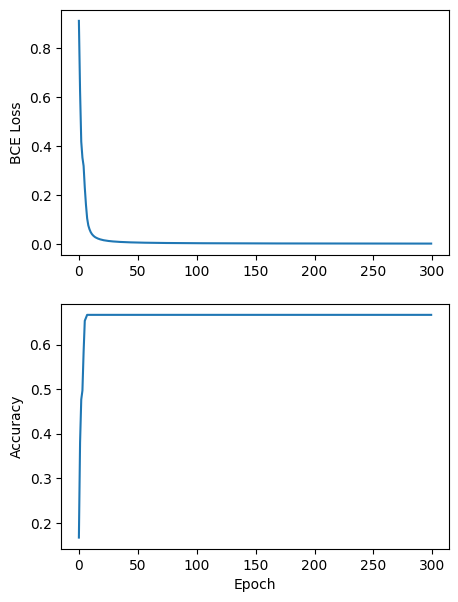

In [ ]:
from torch.optim import SGD
from tqdm import tqdm
import time
n_samples = 300
BATCH_SIZE = 8
LR = 0.1
EPOCHS = 300

model = MulticlassClassificationModel(
  layers=[
    (3, 4),
    (4, 2),
    (2, 4)
  ]
)

dataset, X = get_dataset(n_samples=n_samples, batch_size=BATCH_SIZE)
device = get_device()
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)
epoch_losses, epoch_accs = [], []

for epoch in tqdm(range(EPOCHS), desc="진행중"):
  epoch_loss, epoch_acc = train(data_loader=dataset,
                                n_samples=n_samples,
                                model=model,
                                loss_function=loss_function,
                                optimizer=optimizer,
                                device=device,
                                y_type=torch.long)
  epoch_losses.append(epoch_loss)
  epoch_accs.append(epoch_acc)
  if (epoch+1) % int(EPOCHS/10) == 0:
    print(f"{epoch+1}) epoch_loss {epoch_loss}, epoch_acc {epoch_acc}")
  time.sleep(0.01)

vis_losses_accs(epoch_losses, epoch_accs)

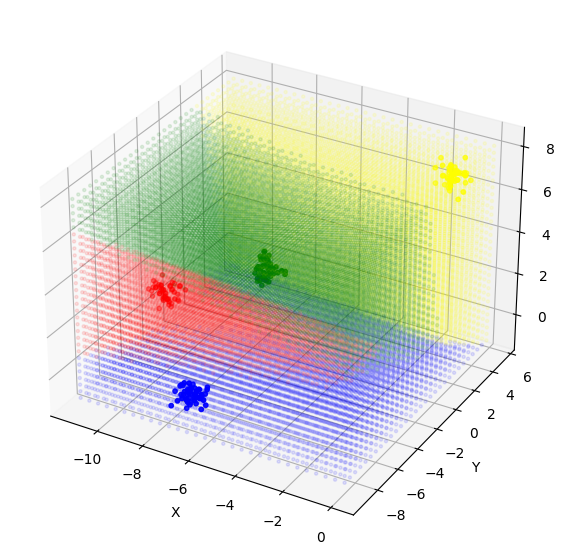

In [ ]:
preds = model(torch.FloatTensor(X))
vis_classifications(model, X, preds, device)